___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://img.freepik.com/free-vector/depression-concept-illustration_114360-3747.jpg?t=st=1657678284~exp=1657678884~hmac=b8b1d71ca0a8eb2e4ff5bf31d6a98624112f1a2254b0f39e92254ed12d7875b2" width="240px" height="180px" />

# <font color= #bbc28d> **Clasificación de Depresión - EDA** </font>
#### <font color= #2E9AFE> `Proyecto de Ciencia de Datos`</font>
- <Strong> Sofía Maldonado, Diana Valdivia, Samantha Sánchez & Vivienne Toledo </Strong>
- <Strong> Fecha </Strong>: 30/09/2025

___

<p style="text-align:right;"> Image retrieved from: https://img.freepik.com/free-vector/depression-concept-illustration_114360-3747.jpg?t=st=1657678284~exp=1657678884~hmac=b8b1d71ca0a8eb2e4ff5bf31d6a98624112f1a2254b0f39e92254ed12d7875b2/p>

### <font color= #bbc28d>• **Data Loading** </font>

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
# Data import
df = pd.read_csv("../data/raw/depression_dataset.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


### <font color= #bbc28d>• **Data Info** </font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### <font color= #bbc28d>• **Eliminar nulos** </font>

La única columna con valores nulos es `financial stress` y solamente hay 3 nulos. Por ende, vamos a quitar estas 3 filas por completo.

In [4]:
df = df.dropna()

### <font color= #bbc28d>• **Descripción de Variables Numéricas - Histogramas** </font>

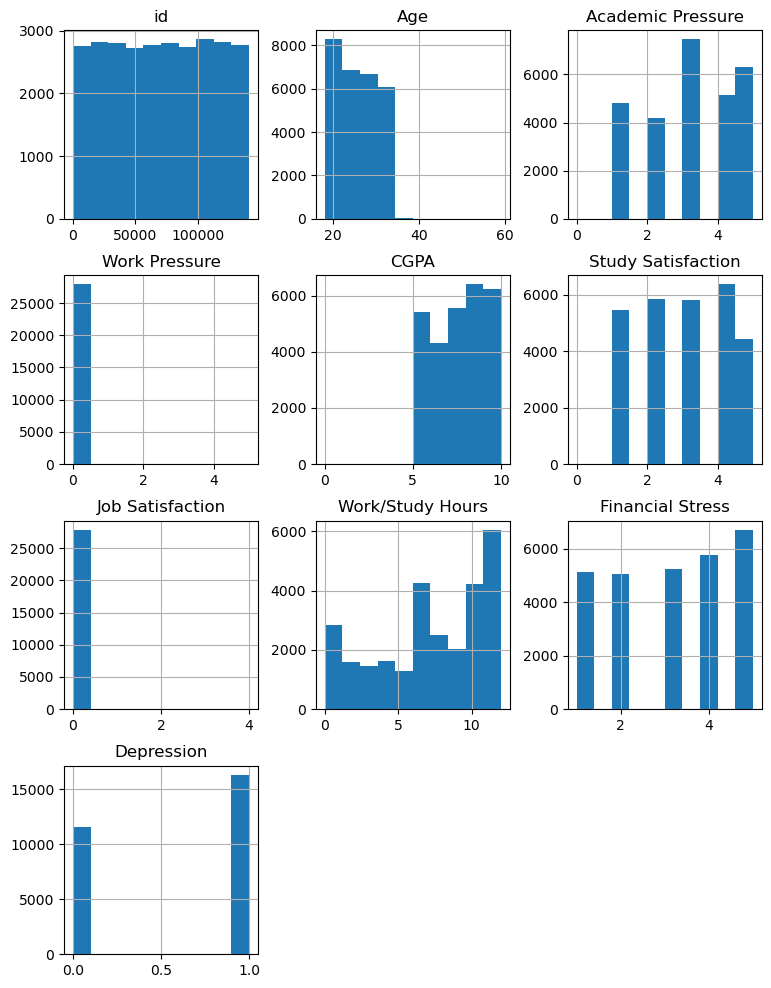

In [5]:
hist = df.hist(figsize=(9, 12))

- La mayoría de personas en el dataset *sí* padecen de depresión. Quizás valdría la pena generar datos sintéticos para la clase minoritaria, para permitir que nuestro modelo tenga clases equilibradas y aprenda mejor.
- Hay niveles muy altos de estrés financiero, una variable que posiblemente va a terminar siendo muy relevante.
- Similarmente, hay niveles muy altos de presión académica.
- Podemos ver a simple vista que las variables **Job Satisfaction** y **Work Pressure** la mayoría se centran en un solo valor el cuál es el 0, por lo que podrían no ser relevantes para el modelo.
- La edad se concentra la mayoría entre 18 y los 30 [esto seguramente por que se trata de estudiantes], por lo que son valores atípicos que habrá que tratar.

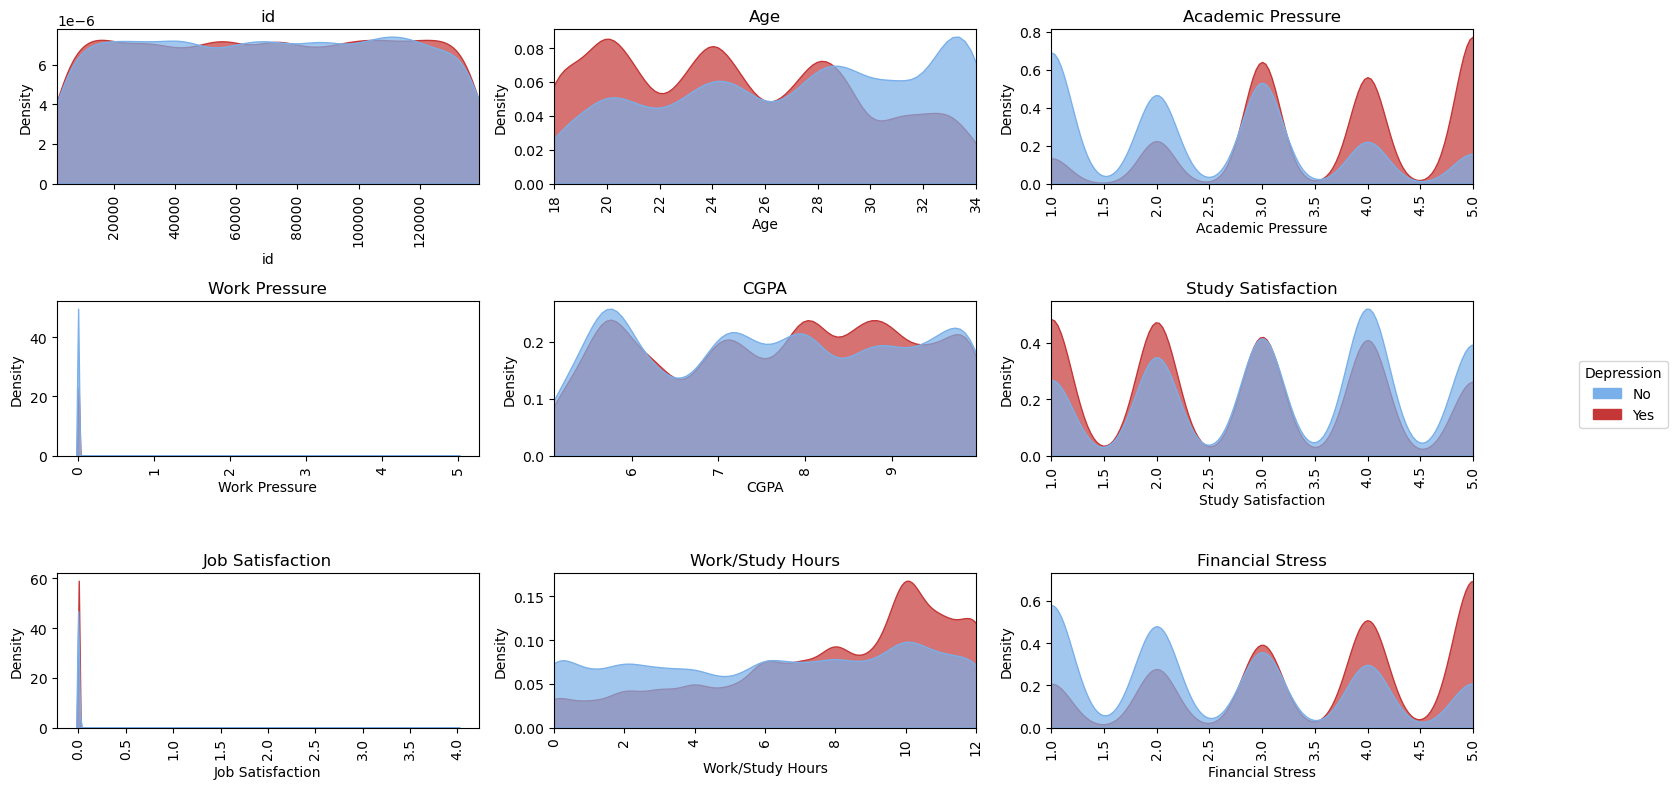

In [18]:
# Filtrar variables numéricas
numeric_vars = df.select_dtypes(include='number').columns.tolist()

# Crear grid 3x4
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
axes = axes.flatten()

# Paleta de colores
palette = {0: '#79b0e9', 1: '#c53636', }

# Mapa de las etiquetas
label_map = {0: 'No', 1: 'Yes'}

# Gráficos
for i, var in enumerate(numeric_vars[:9]):
    ax = axes[i]
    sns.kdeplot(data=df, x=var, hue='Depression', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)
    ax.get_legend().remove()

    # Ajustar los ejes de cada gráfico para que se observen bien
    q_low, q_high = df[var].quantile([0.01, 0.99])
    if q_low != q_high:
        ax.set_xlim(q_low, q_high)

# Leyenda
legend_patches = [Patch(color=color, label=label_map[label]) for label, color in palette.items()]
fig.legend(handles=legend_patches, title='Depression', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout()
plt.show()

### <font color= #bbc28d>• **Descripción de Variables Categóricas** </font>

In [11]:
df.describe(include="object")

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27898,27898,27898,27898,27898,27898,27898,27898
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15546,1570,27867,8309,10316,6080,17656,14397


<li> La mayoría de personas dicen haber tenido pensamientos suicidas
<li> La mayoría <b>no</b> tiene un historial familiar de problemas con la salud mental

In [12]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


<li> Este es un estudio de gente jóven, la edad promedio es de apenas 25.8 años.
<li> Este subset de personas trabaja mucho. En promedio, 7 horas

### <font color= #bbc28d>• **Descripción de Variables Categóricas - Bar plots** </font>

{'Male': 15546, 'Female': 12352}


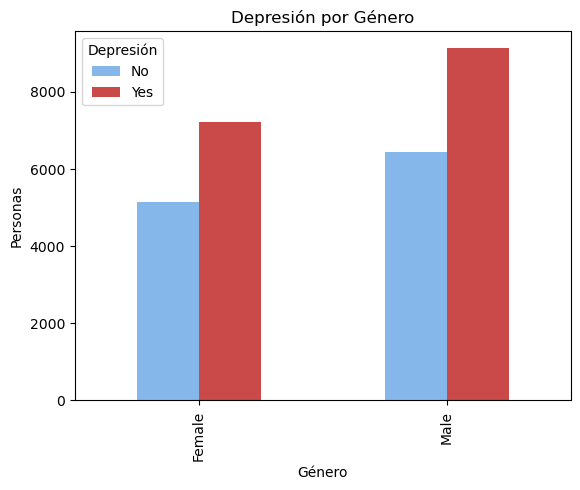

In [41]:
def grafica_cualitativa(var, var_name):
    # Paleta de colores y etiquetas
    palette = {0: '#79b0e9', 1: '#c53636'}
    labels = {0: 'No', 1: 'Yes'}

    # Gráfica
    ct = pd.crosstab(var, df.Depression)
    ct.plot(kind='bar', color=[palette.get(c, 'gray') for c in ct.columns], alpha=0.9)

    # Estética
    plt.title(f'Depresión por {var_name}')
    plt.xlabel(f'{var_name}')
    plt.ylabel('Personas')
    plt.legend([labels.get(c, c) for c in ct.columns], title='Depresión')

    print(var.value_counts().to_dict())

grafica_cualitativa(df['Gender'], 'Género')

<li> Contamos con más hombres que mujeres en nuestro dataset.
<li> Si bien no parece que haya una mayor prevalencia de la depresión según el género, por la cantidad de hombres en el dataset, parece que son más propensos a padecer depresión. 

{'Unhealthy': 10316, 'Moderate': 9921, 'Healthy': 7649, 'Others': 12}


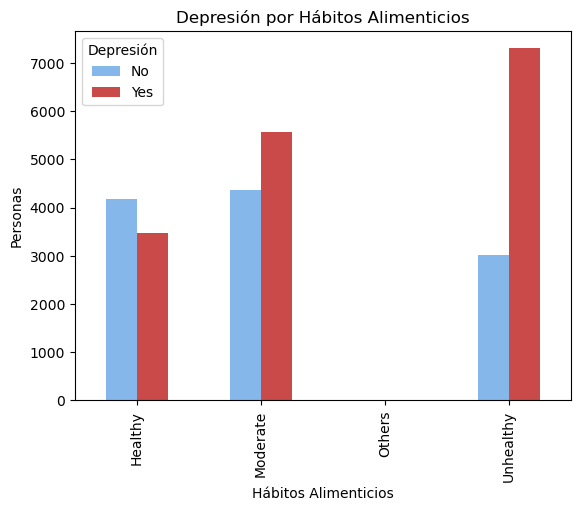

In [43]:
grafica_cualitativa(df['Dietary Habits'], 'Hábitos Alimenticios')

<li> Hábitos poco saludables de alimentación son una señal fuerte de la presencia de depresión.
<li> Hábitos saludables de alimentación parecen no afectar o aumentar la presencia de depresión.

{'Less than 5 hours': 8309, '7-8 hours': 7346, '5-6 hours': 6181, 'More than 8 hours': 6044, 'Others': 18}


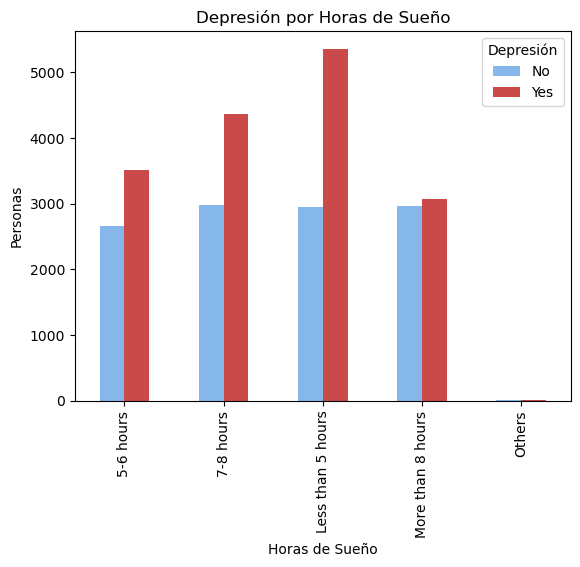

In [44]:
grafica_cualitativa(df['Sleep Duration'], 'Horas de Sueño')

<li> Pocas horas de sueño (menos de 8 horas) están ligadas a la presencia de depresión.
<li> Arriba de 8 horas, la duración del sueño no parece ser un factor decisivo en la prevalencia de la depresión.

{'Class 12': 6080, 'B.Ed': 1866, 'B.Com': 1506, 'B.Arch': 1478, 'BCA': 1432, 'MSc': 1190, 'B.Tech': 1152, 'MCA': 1044, 'M.Tech': 1022, 'BHM': 925, 'BSc': 888, 'M.Ed': 821, 'B.Pharm': 810, 'M.Com': 734, 'BBA': 696, 'MBBS': 695, 'LLB': 671, 'BE': 613, 'BA': 600, 'M.Pharm': 582, 'MD': 572, 'MBA': 562, 'MA': 544, 'PhD': 522, 'LLM': 482, 'MHM': 191, 'ME': 185, 'Others': 35}


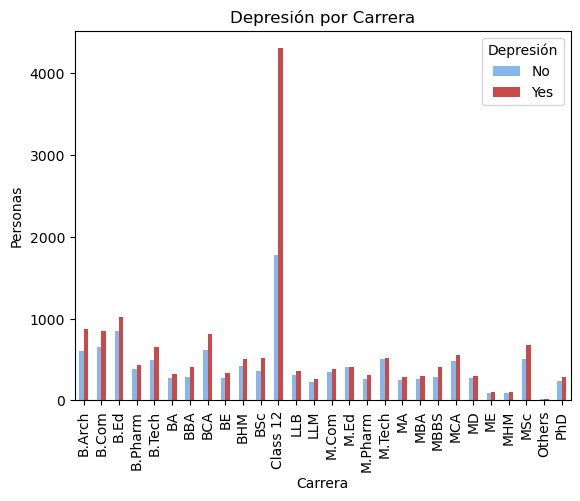

In [45]:
grafica_cualitativa(df['Degree'], 'Carrera')

<li> La carrera o nivel de estudios más común en nuestro dataset son aquellas personas que terminaron el bachillerato. Aun así, parece que las personas que solo terminaron este grado de estudios son más propensas a padecer de depresión que cualquier otro grupo, por la diferencia entre aquellas sin y con depresión.
<li> No existe una carrera donde las personas sin depresión superen a aquellas con este padecimiento. 

{'Student': 27867, 'Architect': 8, 'Teacher': 6, 'Digital Marketer': 3, 'Content Writer': 2, 'Chef': 2, 'Doctor': 2, 'Pharmacist': 2, 'Civil Engineer': 1, 'UX/UI Designer': 1, 'Educational Consultant': 1, 'Manager': 1, 'Lawyer': 1, 'Entrepreneur': 1}


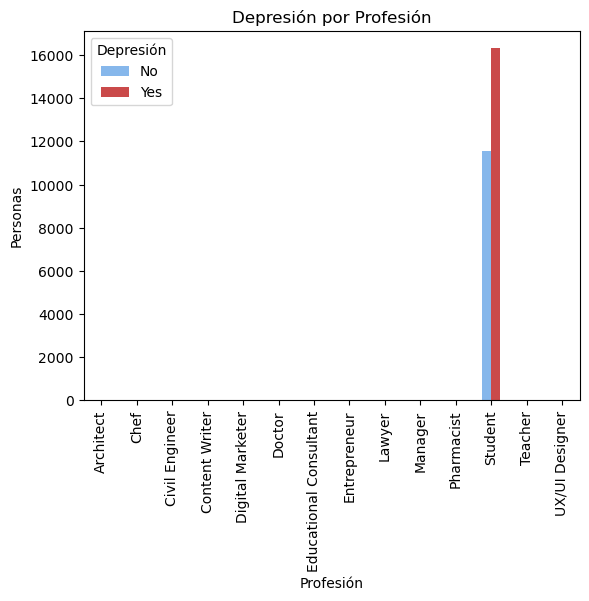

In [46]:
grafica_cualitativa(df['Profession'], 'Profesión')

In [21]:
df["Profession"].value_counts()

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

Ya que solamente $0.11$% de las personas que respondieron la encuesta no son estudiantes, no vamos a considerar esta columna para nuestros modelos

In [22]:
df["City"].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

Las ciudades del dataset son todas localidades de la India, en gran parte urbanas, aunque podemos ver que existen ciudades con un solo registro o que los valores que toman no son propios de una ciudad [i.e. 3.0 o Less Delhi], por lo que habrá que tratarlas en el pre-procesamiento.

{'Yes': 17656, 'No': 10242}


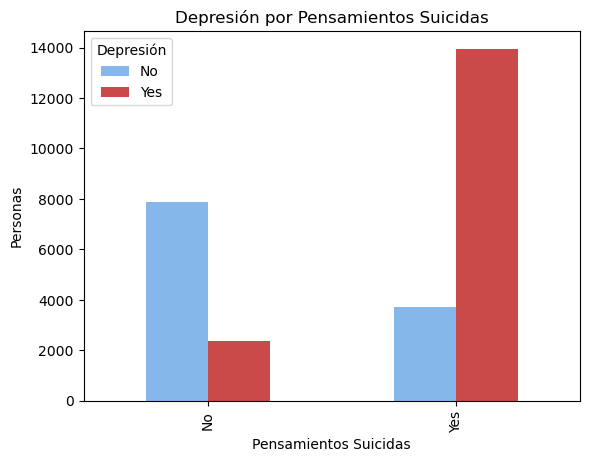

In [48]:
grafica_cualitativa(df['Have you ever had suicidal thoughts ?'], 'Pensamientos Suicidas')

- La mayoría de las personas en nuestro dataset han reportado tener pensamientos suicidas ($63.2$%)
- La presencia de pensamientos suicidas incrementa la probabilidad de padecer depresión. 

{'No': 14397, 'Yes': 13501}


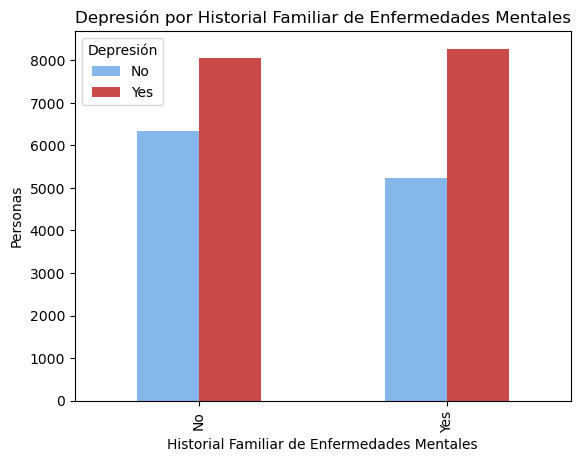

In [49]:
grafica_cualitativa(df['Family History of Mental Illness'], 'Historial Familiar de Enfermedades Mentales')

- El historial familiar parece incrementar levemente la presencia de la depresión.